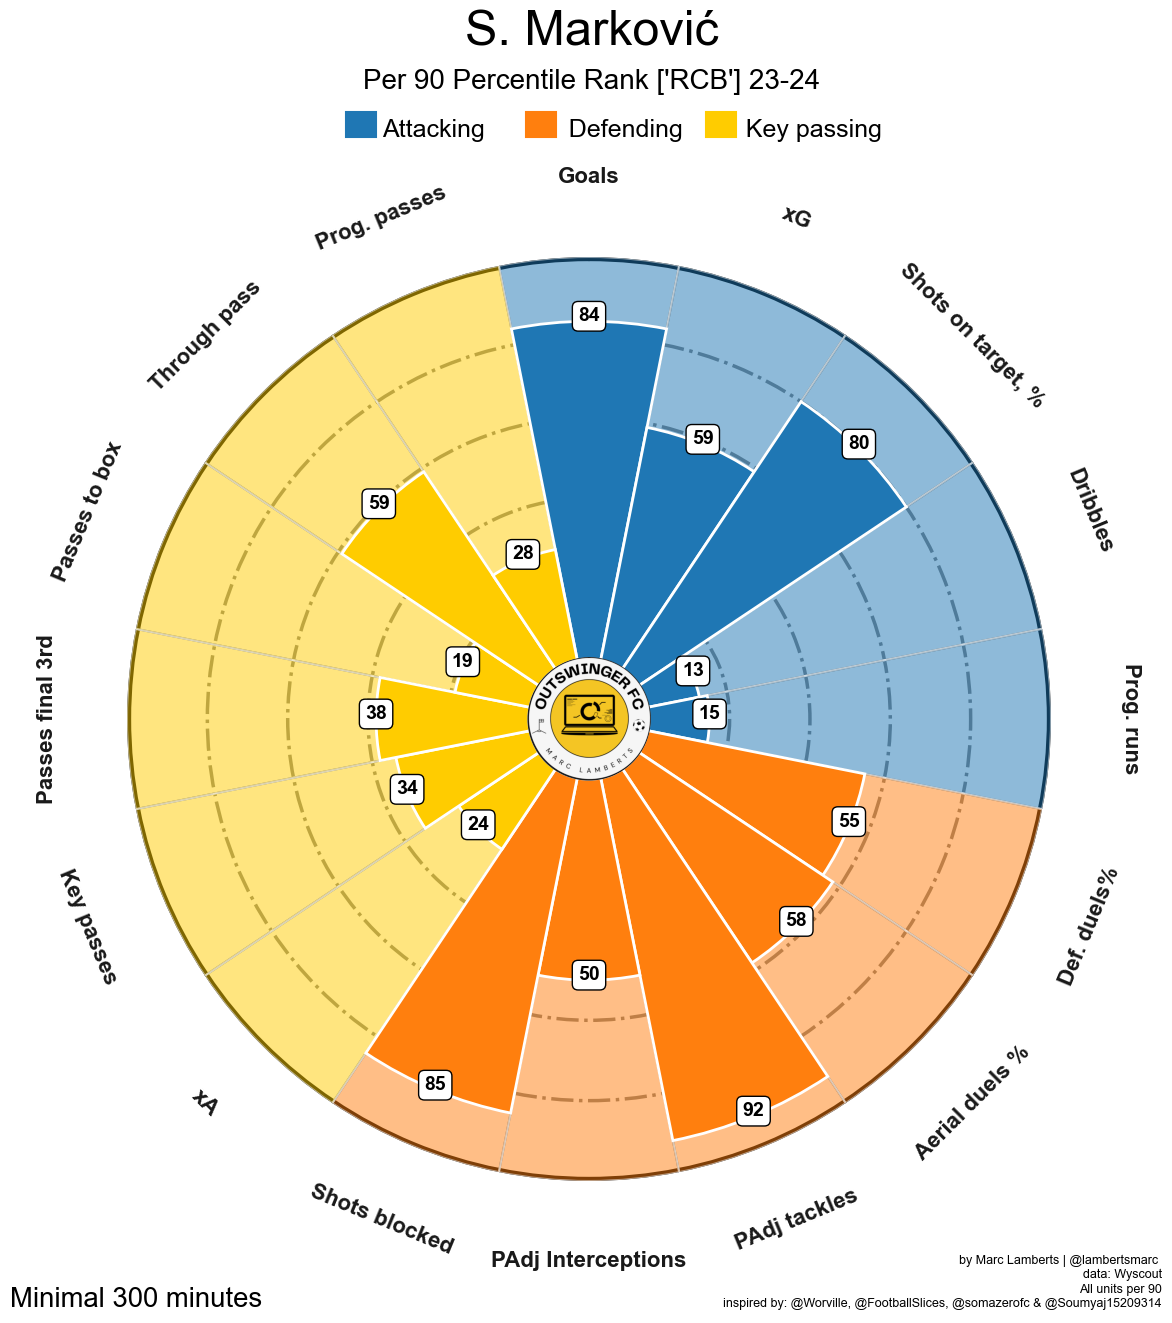

In [100]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image
import matplotlib.pyplot as plt

# Load data from Excel file
df = pd.read_excel('/Users/marclambertes/Downloads/NEW.xlsx')

# Filter based on minutes played and position
df = df[df['Minutes played'] >= 90]
positions_to_filter = ['RCB']
filtered_df = df[df['Position'].isin(positions_to_filter)]

# Drop unnecessary columns and reset index
df = df.drop(['Team', 'Position', 'Age', 'Matches played', 'Minutes played'], axis=1).reset_index()

# Create a parameter list
params = list(df.columns)
params = params[2:]

# Select the player and get their data
player_name = 'S. Marković'
player_df = df.loc[df['Player'] == player_name].reset_index()
player = list(player_df.loc[0])

# Drop the first 3 items from the player list to align with params
player = player[3:]

# Calculate percentile values
values = [math.floor(stats.percentileofscore(df[param], player[i])) for i, param in enumerate(params)]
values = [99 if v == 100 else v for v in values]  # Ensure no value is exactly 100

# Initialize PyPizza with a larger central circle and increased inner circle size
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="black",    # color for straight lines
    straight_line_lw=1.5,           # linewidth for straight lines
    last_circle_lw=6,               # increase linewidth to make the center circle bigger
    other_circle_lw=2.5,            # linewidth for other circles
    other_circle_ls="-.",
    inner_circle_size=15            # Increase inner circle size to allow logo fitting
)

# Slice colors and text colors
slice_colors = ["#1f77b4"] * 5 + ["#ff7f0e"] * 5 + ["#ffcc00"] * 6
text_colors = ["#000000"] * 8 + ["white"] * 5

# Load logo image
logo_image = plt.imread('/Users/marclambertes/Downloads/Outswinger FC (3).png')

# Plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(12, 12),    # adjust figsize according to your need
    param_location=120,  # where the parameters will be added
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict( 
        edgecolor="white",  # make slice edges distinct
        zorder=2, linewidth=2  # thicker slice borders
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="black", fontsize=16, weight='bold',  # make text bolder and larger
        va="center", alpha=.9
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="black", fontsize=14, weight='bold',
        zorder=3,
        bbox=dict(
            edgecolor="black", facecolor="white",  # White background for the percentile values
            boxstyle="round,pad=0.3", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# Set background to white
fig.patch.set_facecolor('white')  # White background for figure
ax.set_facecolor('white')  # White background for axis

# Adjust the central circle size and place the logo inside the inner circle
# Logo placement and size to fill the inner circle
add_image(logo_image, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127, zorder=15)

# Add player name, titles, and additional text
fig.text(
    0.515, 0.97, f"{player_name}\n\n", size=35, ha="center", color="black"
)
fig.text(
    0.515, 0.97, f"Per 90 Percentile Rank {positions_to_filter} 23-24\n\n", size=20, ha="center", color="black"
)
fig.text(0.03, 0.005, "Minimal 300 minutes", color="black")

# Add credits
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Wyscout\nAll units per 90"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
fig.text(0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9, color="black", ha="right")

# Add label text for each section
fig.text(
    0.34, 0.98, "Attacking            Defending         Key passing", size=18, color="black"
)

# Add colored rectangles for sections
fig.patches.extend([
    plt.Rectangle((0.31, 0.98), 0.025, 0.021, fill=True, color="#1f77b4", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.46, 0.98), 0.025, 0.021, fill=True, color="#ff7f0e", transform=fig.transFigure, figure=fig),
    plt.Rectangle((0.61, 0.98), 0.025, 0.021, fill=True, color="#ffcc00", transform=fig.transFigure, figure=fig)
])

# Save the figure as PNG with 500 DPI
plt.savefig('/Users/marclambertes/Downloads/player_pizza_chart.png', dpi=500, bbox_inches='tight', facecolor='white')

# Show the plot
plt.show()
